<a href='http://www.algebra.hr'> <img src='../algebra_logo_color_h.png' alt="Algebra" width="500" /></a>
___
# Matplotlib - Vizualizacija podataka

Čovjekov mozak puno lakše "čita" grafičke prikaze podataka, nego tablične prikaze s brojevima. Do sada smo se bavili tabličnim prikazom podataka pa je vrijeme za prikaz podataka u obliku grafova. Tijekom ovog seminara, nećemo se baviti animacijom niti 3D prikazom podataka, ali svakako podržavamo svaki nastavak istraživanja u području podatkovne znanosti i vizualizacije podataka.

Python ima jako puno biblioteka koje mogu grafički prikazati podatke, ali se, za potrebe analize podataka (podatkovne znanosti), *matplotlib* pokazao kao jedna od najboljih. Matplotlib je (više detalja na stranici: https://matplotlib.org/2.0.2/index.html) Python biblioteka namijenjena za 2D grafički prikaz podataka. Standardni je dio Anaconda distribucije, a naravno, može se instalirati zasebno.

Matplotlib nije tako jednostavna biblioteka za korištenje, ali zahvaljujući Pandas biblioteci, u kojoj imamo pomoćne metode, korištenje matplotlib biblioteke prilično je jednostavno.

Za potrebe ovog dijela koristit ćemo se *casedistribution.csv* te *csv* datotekama koje smo koristili u prethodnim vježbama i primjerima. Ipak, primarna *csv* datoteka bit će *casedistribution.csv* datoteka, dostupna na adresi: https://opendata.ecdc.europa.eu/covid19/casedistribution/csv, a preuzeta je 29.08.2021.

Korištenje matplotlib biblioteke započinje njezinim dodavanjem u skriptu naredbom *import*.

In [1]:
import matplotlib.pyplot as plt # plt je uobičajen naziv za matplotlib.pyplot kao što je pd za pandas

Jupyter Notebook omogućava takozvane *magic commands* koje uvijek započinju znakom *%*. Tako postoji i *magic* naredba za matplotlib (odnosno dvije):

In [2]:
%matplotlib inline

Omogućava integraciju statičkih prikaza grafova unutar Jupyter Notebook dokumenta. Osim toga, samo unutar Jupyter Notebook dokumenta omogućava prikaz grafova bez pozivanja naredbe *plt.show()*.

Druga *magic* naredba je *%matplotlib notebook* koja dodaje određenu razinu interaktivnosti, ali u nekim situacijama može kreirati bugove pa ćemo je većinom izbjegavati.

Kreirajmo naš prvi graf. Osim što smo uključili matplotlib, potreban nam je i Pandas da bismo učitali podatke iz *csv* datoteke.

In [3]:
import pandas as pd

In [4]:
casedistribution_df = pd.read_csv('../Data/Vjezbe_Primjeri/casedistribution.csv', parse_dates=['dateRep'])
casedistribution_df

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-11-12,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-10-12,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
...,...,...,...,...,...,...,...,...,...,...,...,...
61895,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61896,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61897,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61898,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


Nakon što smo učitali podatke, u *plt.plot* metodu proslijedit ćemo podatke za x i y os grafa te na kraju pozvati *plt.show()* metodu koja će stvarno iscrtati graf.

**NAPOMENA: naredbu *plt.show()* nije nužno koristiti jer koristimo magic naredbu, ali smo je naveli kako bismo vam ukazali na potrebu njezinog korištenja unutar drugih razvojnih okruženja.**

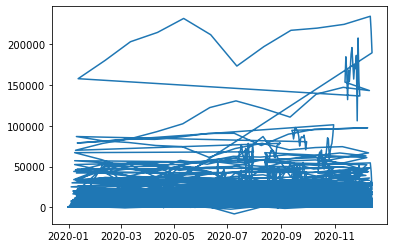

In [5]:
plt.plot(casedistribution_df.dateRep, casedistribution_df.cases)
plt.show()

Iz ovog se grafa ništa ne može vidjeti.

**PITANJE**<br>
**Što mislite da treba napraviti da bi se graf ljepše iscrtao?**

ODGOVOR<br>
To je zbog načina pretvaranja datuma iz kolone "dateRep". Za sada će biti dovoljno samo malo grupirati podatke i graf će izgledati čitljivije.

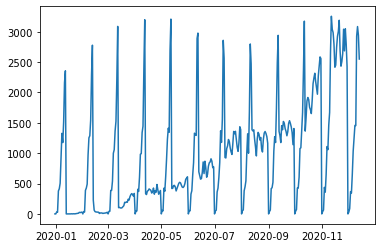

In [6]:
var_graf = casedistribution_df.groupby('dateRep', as_index=False).mean()
plt.plot(var_graf.dateRep, var_graf.cases)

Kao što smo naveli, *plt.plot()* metoda kao prvi argument koristi podatke za x (horizontalnu os), a kao drugi argument za y (okomitu os). Treći argument koristi se za format grafa. Format grafa (linije) je tekstualna varijabla od tri elementa *'\[marker\]\[stil_linije\]\[boja\]'*. Isprobajmo prikazati graf s plavim kružićima za svaku točku:

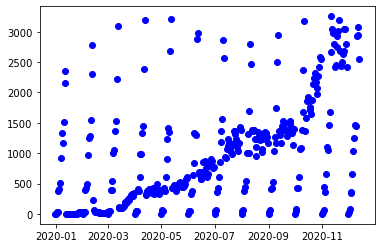

In [7]:
plt.plot(var_graf.dateRep, var_graf.cases, 'ob') 
# 'ob' znaci => o (malo slovo o) - kruzici, a b je blue, plava boja.

**Zadatak**<br>
**Iscrtajte gornji graf zelenim crticama!**

U nastavku su primjeri formatiranja linija grafa.

|Marker|Stil linije|Boja|Format|Rezultat|
|------|-----------|----|------|--------|
| |-|b|-b|plava puna linija|
|.||k|.k|crne točke|
| |--|r|--r|crvena isprekidana linija|
|o|-|g|o-g|zelena puna linija s kružićima|
| |:|m|:m|magenta točkasta linija|
|x|-.|c|x-.c|ljubičasta (cyan) crta-točka linija s x-ićima|

Okvir u kojem je prikazan graf predstavlja objekt koji se zove *figure* (više detalja na: https://matplotlib.org/2.0.2/faq/usage_faq.html#figure). Međutim, umjesto da kreiramo *figure* objekt metodom "*plt.figure()*" i u njemu zasebno sve elemente, mi ćemo za cijeli *plt import* podesiti parametre za veličinu okvira kako bi nam prikaz grafova bio jasniji.

In [8]:
plt.rcParams['figure.figsize'] = [10, 8] # Podesit ćemo širinu i visinu okvira
plt.rcParams['figure.dpi'] = 100 # gustoću prikaza dpi = dots per inch

*INFORMACIJA<br>
Malo kasnije ćemo se detaljnije upoznati s "plot" i "figure" objektom.*

Ponovimo prikaz gornjeg grafa.

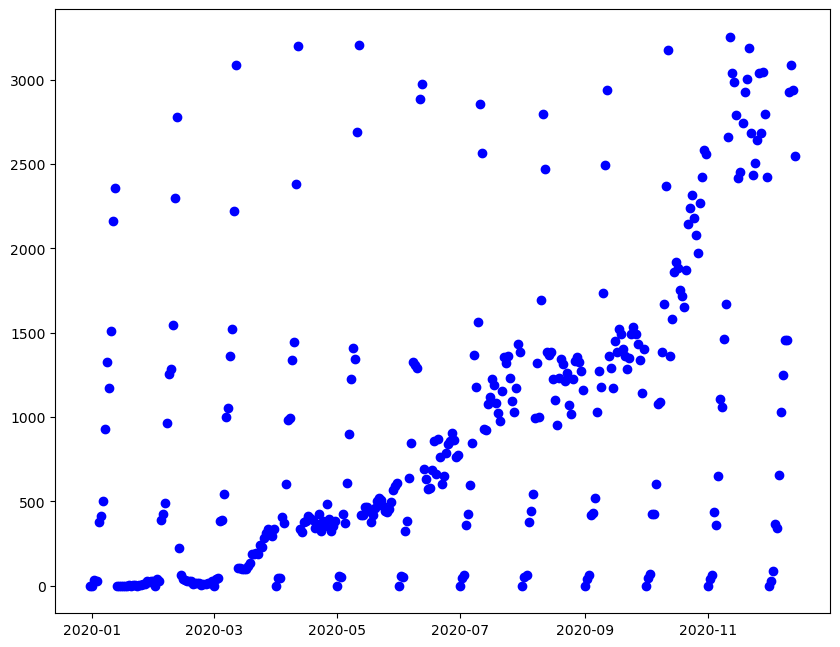

In [9]:
plt.plot(var_graf.dateRep, var_graf.cases, 'ob') 

Puno bolje i jasnije.

Na trenutak zastanimo i analizirajmo ovaj graf. Lako možemo uočiti obrise krivulje na lijevoj strani, na početku, bliže x osi, a prema desno se sve više odvaja od nje. Isto tako, možemo vidjeti kako ima određeni broj točkica koje su "razbacane" po cijelom grafu. Te točke su ekstremne vrijednosti.

Iscrtajmo još jednom graf običnom linijom, a koji nam može reći puno više o podacima.

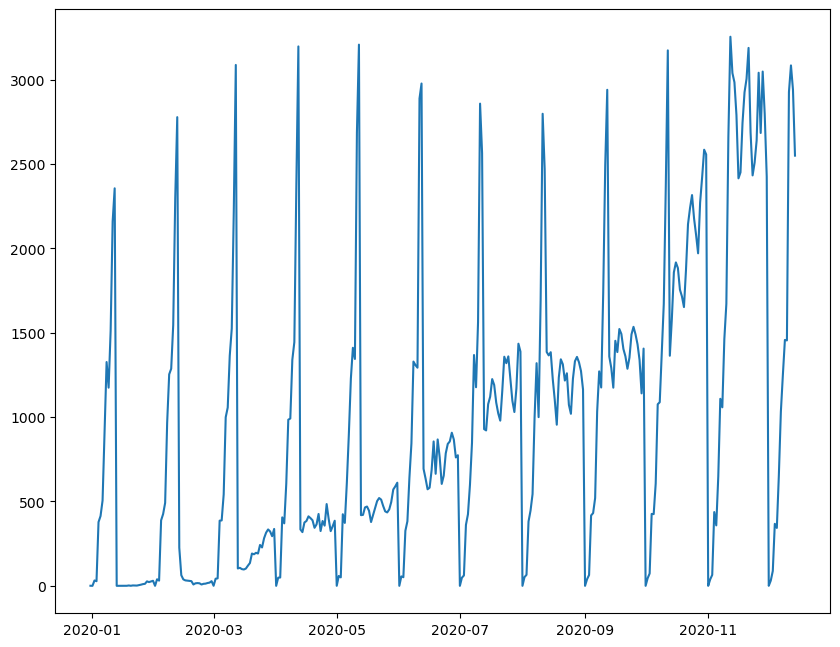

In [10]:
plt.plot(var_graf.dateRep, var_graf.cases)

Ovaj graf pokazuje da se u određenim intervalima pojavljuju skokovi u broju zaraženih, ali i isto tako da se ukupni broj zaraženih s vremenom povećava.

### plt.plot() i "Figure" objekt

Upoznali smo se s *matplotlib.plot()* ili *plt.plot()* metodom. Sad je vrijeme da se upoznamo s *Figure* objektom koji metoda *plt.plot()* kreira u pozadini. *Figure* je glavni objekt u matplotlib biblioteci (kao što je *DataFrame* u Pandas biblioteci). Dakle, *Figure* objekt u sebi čuva podatke o osima (*Axes*, X i Y os), a svaka os ima podatke o linijama, točkama itd. Što je točno uključeno u *Figure* objekt opisuje slika:<br>
<img src='../matplotlib_anatomy_figure.png' alt="Algebra" width="800" />
<br>
**Anatomija matplotlib Figure objekta**<br>
Preuzeto s: https://matplotlib.org/stable/gallery/showcase/anatomy.html.

*Figure* objekt možemo kreirati izravno i u njega naknadno dodavati elemente. Matplotlib za kreiranje *Figure* objekta ima *figure()* metodu. Pogledajmo kako radi i što sve možemo s *Figure* objektom. Kreirat ćemo jedan objekt naziva "okvir".

In [11]:
okvir = plt.figure()

<Figure size 1000x800 with 0 Axes>

Pojednostavljeno, dobili smo jedan prazan okvir za graf koji trenutno nema definirane osi, niti linije. Dodajmo osi metodom *add_axes(\[lijevo, dolje, sirina, visina\])* u naš okvir.

*<Figure size 1000x800 with 0 Axes> *

Prvo ćemo definirati veličinu našeg okvira pomoću argumenta *figsize=()*. Iz gornjeg rezultata vidi se da je veličina 1000x800 pixela. To je rezultat postavki koje smo definirali nekoliko ćelija iznad.

Predefinirana jedinica za veličinu okvira su inči (*inch*). Za korištenje drugih jedinica kod zadavanja veličine trebamo uključiti preračunavanje.

Ako želimo vratiti incijalne postavke, jednostavno pozovemo *plt.rcdefaults()* metodu koja će postavke veličine vratiti na početne postavke.

In [12]:
# vratimo postavke veličine na inicijalne vrijednosti
plt.rcdefaults()

Unutar okvira možemo dodavati više grafova koje definiramo kroz metodu *add_axes()*. Tako možemo dodati graf unutar grafa.

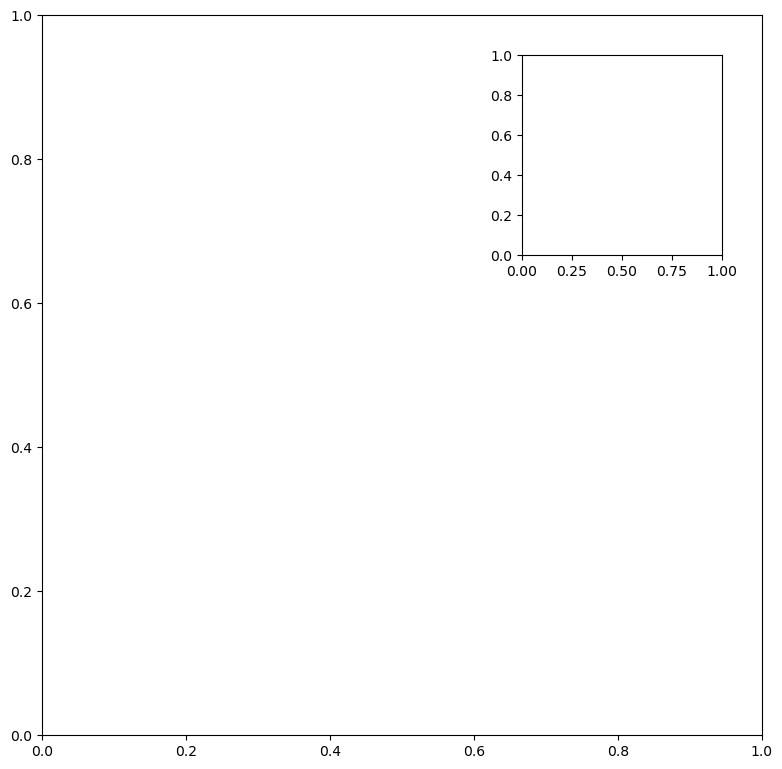

In [13]:
okvir = plt.figure(figsize=(8,8))
vanjski_graf = okvir.add_axes([0.1,0.1, 0.9, 0.9])
unutarnji_graf = okvir.add_axes([0.7,0.7, 0.25, 0.25])

**Zadatak**<br>
**Promjenom parametara metode add_axes(), pozicionirajte unutarnji okvir u:**
- **gornji lijevi kut**
- **donji lijevi kut**
- **sredinu**

Isto tako, unutar okvira možemo definirati mrežu kolona i redova (kao tabela) te unutar njih dodavati grafove, bolje rečeno podgrafove.

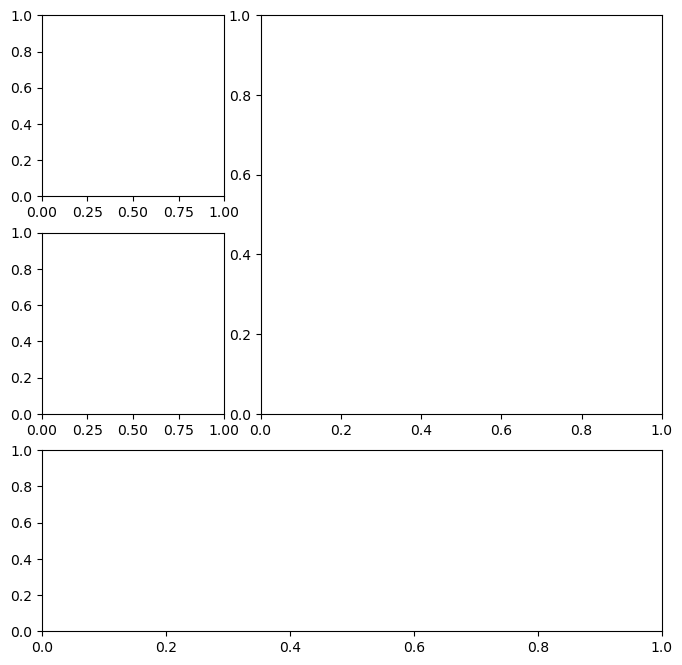

In [14]:
okvir = plt.figure(figsize=(8, 8)) # figsize 
gs = okvir.add_gridspec(3, 3) # postavke mreze -> 3 stupca, tri reda

# PAZNJA - indeksi pocinju s bojem 0
gore_lijevo = okvir.add_subplot(gs[0, 0]) # zauzima prvi red i prvi stupac
sredina_lijevo = okvir.add_subplot(gs[1, 0]) # zauzima drugi red i prvi stupac
gore_desno = okvir.add_subplot(gs[:2, 1:]) # zauzima prva dva reda od 0 do 2 te sve stupce pocevsi od drugog
dolje = okvir.add_subplot(gs[2,:]) # zauzima treci red i sve stupce

**Zadatak**<br>
**Promjenom parametara metoda add_gridspec() i add_subplot(), kreirajte gornji raspored okvira kao u ogledalu.**<br>
**Promjenom parametara metoda add_gridspec() i add_subplot(), kreirajte raspored okvira tako da je jedan okvir unutar svake ćelije.**<br>
**Promjenom parametara metoda add_gridspec() i add_subplot(), kreirajte raspored okvira tako da je jedan okvir unutar svakog reda.**<br>
**Promjenom parametara metoda add_gridspec() i add_subplot(), kreirajte raspored okvira tako da je jedan okvir unutar svakog stupca.**

Već smo spomenuli podokvire te jedan okvir unutar drugog i sl. To možemo napraviti tijekom inicijalizacije pa tako možemo okvir podijeliti na redove i kolone te odmah definirati i osi. Pomoću *plt.subplot()* metode kreirat ćemo broj redova (prvi argument) i broj stupaca (drugi argument).

Kreirat ćemo jedan veliki okvir, u kojemu će biti dvije kolone i jedan red.

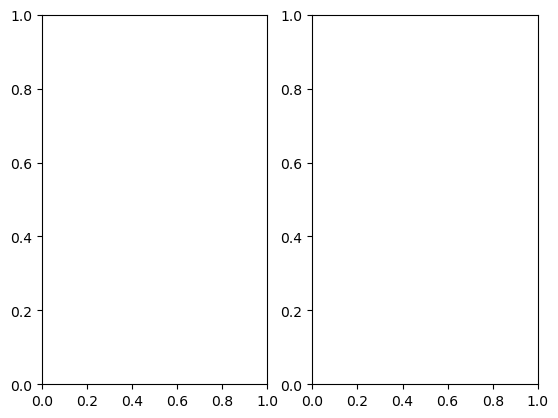

In [15]:
okvir, osi = plt.subplots(1, 2)

**Zadatak**<br>
**Promjenom parametara metode *subplots()*, kreirajte raspored okvira s tri kolone i dva reda. Prilagodite veličinu okvira.**

## Vizualizacija unutar Pandas biblioteke

Već smo se upoznali s Pandas bibliotekom i  spomenuli da je ta biblioteka razvijena na NumPy biblioteci, što znači da ona koristi tu biblioteku za svoj rad. Nismo spomenuli da Pandas za oba tipa objekata (*Serise i DataFrame*) ima ugrađenu *plot()* metodu. Pandas *.plot()* metoda u pozadini koristi matplotlib biblioteku.<br>
Više detalja na: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html.

Neki od najčešće korištenih argumenata Pandas *.plot()* metode:
- *kind* - definira tip grafa - *string*
- *x* ili *y* - definira jednu ili više kolona koje će biti na navedenoj osi - *string* ili lista *stringova*
- *subplots* - pomoću *Boolean* uključuje ili ne uključuje dodatne grafove
- *layout* - pomoću redova, kolona definira broj dodatnih grafova
- *figsize* - pomoću širina, visina definira veličinu okvira
- *title* - definira naslov grafa - *string*
- *grid* - pomoću *Boolean* varijable uključuje linije mreže
- *color* - pomoću r, g, b (crvene, zelene, plave) definira boju grafa.

Argumenata ima jako puno pa je najbolje da krenemo s primjerima kako bismo se upoznali s mogućnostima.

Dodat ćemo novi skup podataka kako bismo lakše opisali neke funkcionalnosti. Koristit ćemo podatke o ocjenama korisnika trgovačkog lanca "mall_customers.csv" koji se nalazi u mapi *Data/Vjezbe_Primjeri/*.

Prvo ćemo napraviti *import* u Pandas.

In [16]:
mall_customers_df = pd.read_csv('../Data/Vjezbe_Primjeri/mall_customers.csv')
mall_customers_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Sljedeći korak je korištenje metode *.plot()* nad upravo kreiranim *DataFrame* objektom.

<AxesSubplot:>

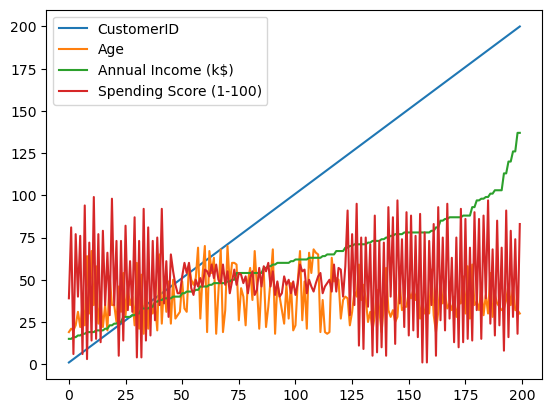

In [17]:
mall_customers_df.plot()

Vizualizacija dobro izgleda. Probajmo to napraviti s *DataFrame* objektom vezanim uz broj oboljelih od Covid virusa.

In [18]:
casedistribution_df.plot()

<AxesSubplot:>

ValueError: Date ordinal -71697858.65 converts to -194333-12-06T08:23:59.998976 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

<Figure size 640x480 with 1 Axes>

Dobili smo poruku:<br>
*ValueError: Date ordinal -71697858.65 converts to -194333-12-06T08:23:59.998976 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.*

Ukratko, problem je u tome što imamo kolonu s datumima koje matplotlib želi pretvoriti u "svoj" format datuma. Matplotlib ima klasu *mdates* koja ima metodu *date2num*, a ona datum pretvara u matplotlib format vremena.

Prvo moramo napraviti import mdates klase iz matplotlib biblioteke te kolonu "*dateRep*" pretvoriti u prikladan format i pokrenuti *.plot()* metodu nad skupom podataka.

<AxesSubplot:>

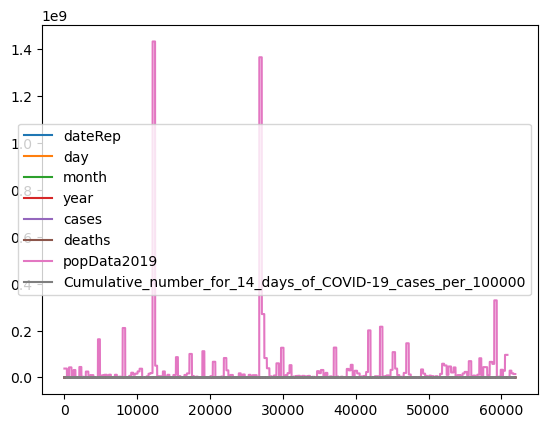

In [19]:
import matplotlib.dates as mdates
casedistribution_df['dateRep'] = mdates.date2num(casedistribution_df['dateRep'])
casedistribution_df.plot()

Gornji graf je u redu, ali neki podaci se ne vide i to nije ono što bismo željeli. Probajmo iskoristiti neke argumente koje smo prethodno spomenuli.

Napisat ćemo da je graf linijski tip, os X će biti kolona "dateRep", a Y će biti kolona "cases", veličina okvira neka bude širina 10, a visina 5. Uključit ćemo opis (*Legend*), a naslov neka bude "Broj Covid slucajeva". Dodat ćemo i style opciju pomoću koje ćemo podesiti tip i boju linije. Postavke će biti "-b", dakle puna linija plave boje.

<AxesSubplot:title={'center':'Broj Covid slucajeva'}, xlabel='dateRep'>

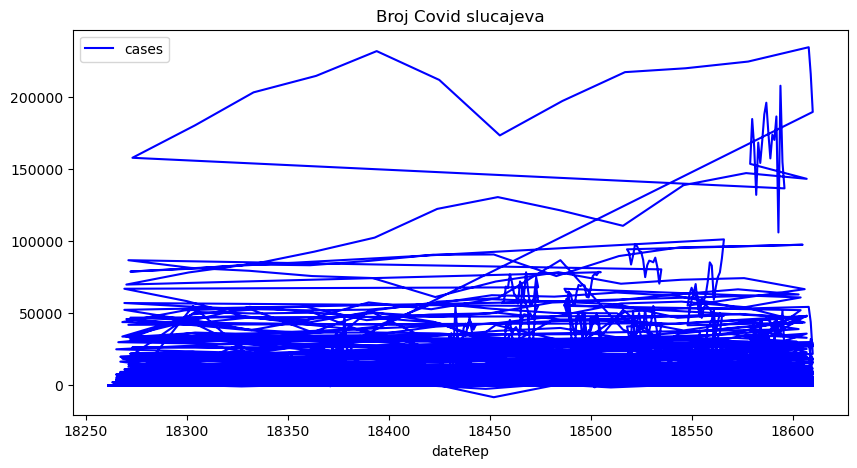

In [20]:
casedistribution_df.plot(
    kind='line', # tip
    x='dateRep', # naziv kolone DataFramea - inicijalna vrijednost je index kolona Pandas DataFrame
    y='cases', # naziv kolone DataFramea
    figsize=(10, 5), # velicina okvira
    style='-b',
    legend=True,
    title='Broj Covid slucajeva'
)

Opet smo dobili isti graf kao na samom početku kada smo koristili matplotlib. Tada smo za prikaz koristili grupiranje rezultata po datumima. Probajmo ponovno, ali ćemo na kraju dodati samo *.plot()* metodu koju smo gore već koristili.

<AxesSubplot:title={'center':'Broj Covid slucajeva'}, xlabel='dateRep'>

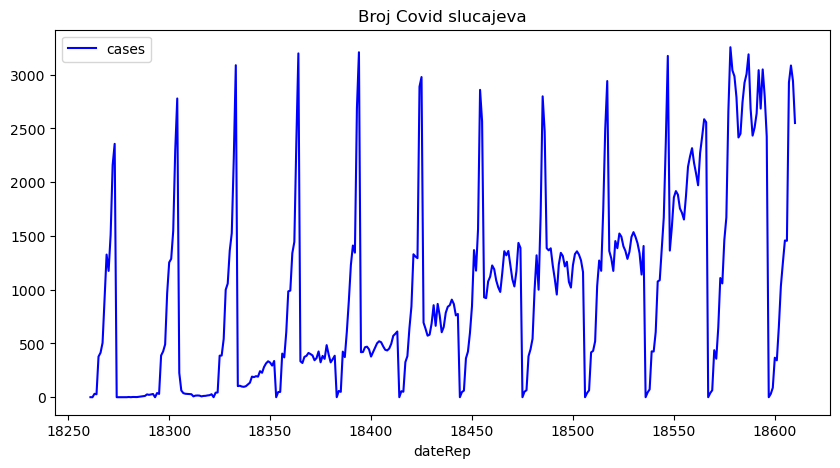

In [21]:
casedistribution_df.groupby('dateRep', as_index=False).mean().plot(
    kind='line', # tip
    x='dateRep', # naziv kolone DataFramea - inicijalna vrijednost je index kolona Pandas DataFrame
    y='cases', # naziv kolone DataFramea
    figsize=(10, 5), # velicina okvira
    style='-b',
    legend=True,
    title='Broj Covid slucajeva'
)

Vizualizacija izgleda puno bolje.

**Vježba**<br>
**Na stranici: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html imate popis vrijednosti koje "*kind*" argument može imati, isprobajte ih na *DataFrame* objektu s Covid podacima. Osim toga, mijenjajte "*style*" argument tako što ćete mu dodjeliti vrijednosti identične za format linije iz matplotlib biblioteke.**

Obratite pažnju na prvu liniju rezultata:

*<AxesSubplot:title={'center':'Naslov grafa'}, xlabel='dateRep'>*

Prvi se dio odnosi na naslov grafa: *title={'center':'Naslov grafa'}*, a označuje kako možemo koristi rječnik, u kojemu je ključ poravnanje, a vrijednost tekst koji želimo prikazati kao naslov grafa. Međutim, ovo je moguće samo ako koristimo više grafova unutar jednog okvira. Argument je "*subplots=True*".

Drugi se dio odnosi na oznaku uz X os: *xlabel='dateRep'*. Podesimo i ovaj parametar, ali analogno predloženom, pokušajmo dodati i za Y os.<br>
*xlabel='Datum'*<br>
*ylabel='Broj zarazenih'*

Provjerimo kako radi.

<AxesSubplot:title={'center':'Broj Covid slucajeva'}, xlabel='Datum', ylabel='Broj zarazenih'>

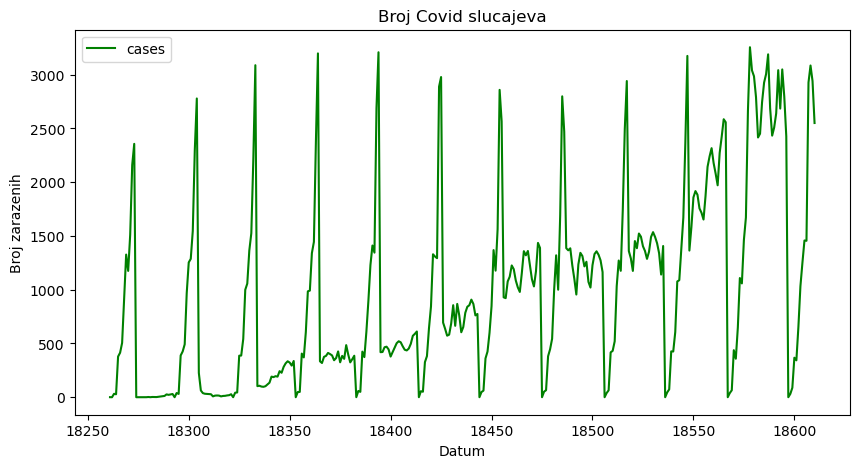

In [22]:
casedistribution_df.groupby('dateRep', as_index=False).mean().plot(
    kind='line',
    
    x='dateRep',
    y='cases',
    xlabel='Datum',
    ylabel='Broj zarazenih',
    
    figsize=(10, 5),
    
    # style='-b', uvjesto ovog načina, koristit ćemo opcije color i linestyle
    color='green',
    linestyle='solid',
    
    legend=True,
    title='Broj Covid slucajeva'
)

Kao što je bilo za očekivati, graf sada ima više informacija i korisniji je. Na početku ovog dijela, u kojem se bavimo iscrtavanjem grafova pomoću Pandas biblioteke, dobili samo više kolona odjednom. Probajmo to ponoviti, ali tako da navedemo samo one kolone koje su nama zanimljive. Uz broj zaraženih probajmo uključiti i broj smrtnih slučajeva.

**VJEŽBA**<br>
**Popis vrijednosti koje mogu biti dodijeljene uz *linestyle* argument imate na stranici: https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html. Isprobajte neke od njih.**

<AxesSubplot:title={'center':'Broj Covid slucajeva'}, xlabel='Datum', ylabel='Broj zarazenih'>

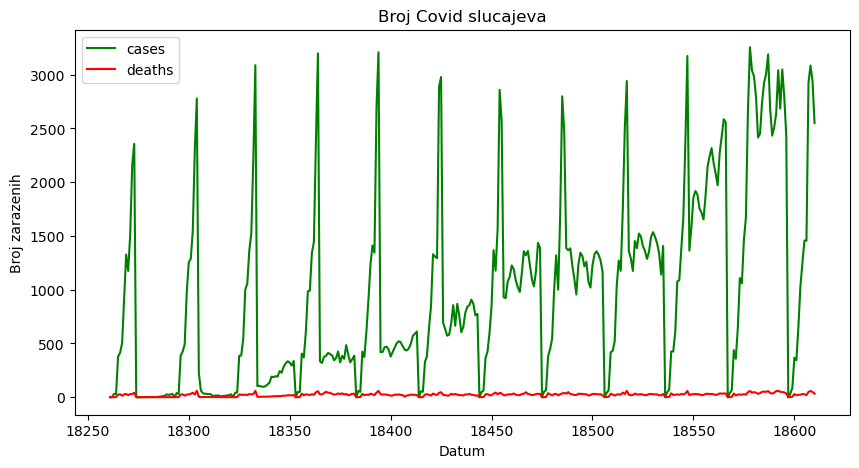

In [23]:
casedistribution_df.groupby('dateRep', as_index=False).mean().plot(
    kind='line',
    
    x='dateRep',
    y=['cases', 'deaths'],
    xlabel='Datum',
    ylabel='Broj zarazenih',
    
    figsize=(10, 5),
    
    # style='-b', uvjesto ovog načina, koristit ćemo opcije color i linestyle
    color=['green', 'red'],
    linestyle='solid',
    
    legend=True,
    title='Broj Covid slucajeva'
)

Srećom, broj je smrtnih slučajeva malen pa se ti podaci, u odnosu na broj zaraženih, gotovo niti ne vide na grafu, odnosno izgledaju kao ravna linija na dnu grafa. Možda da,  umjesto svih redaka, probamo dohvatiti prvih 40 redaka.

<AxesSubplot:title={'center':'Broj Covid slucajeva'}, xlabel='Datum', ylabel='Broj zarazenih'>

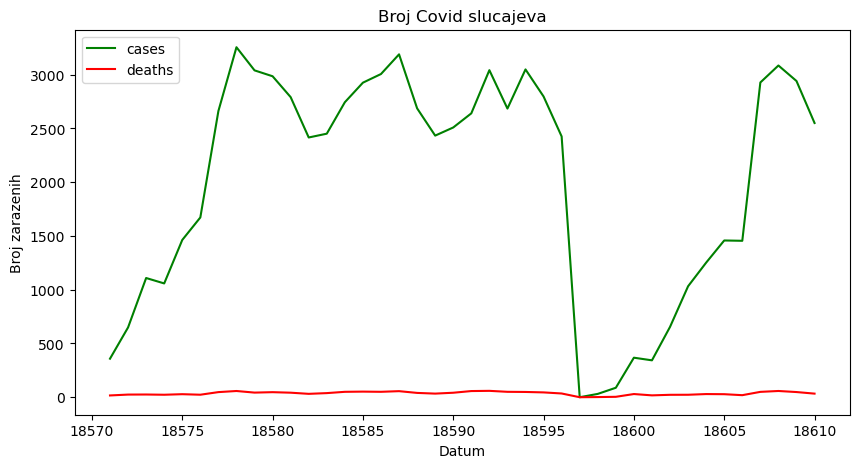

In [24]:
casedistribution_df.groupby('dateRep', as_index=False).mean().tail(40).plot(
    kind='line',
    
    x='dateRep',
    y=['cases', 'deaths'],
    xlabel='Datum',
    ylabel='Broj zarazenih',
    
    figsize=(10, 5),
    
    # style='-b', uvjesto ovog načina, koristit ćemo opcije color i linestyle
    color=['green', 'red'],
    linestyle='solid',
    
    legend=True,
    title='Broj Covid slucajeva'
)

Vizualizacija izgleda bolje, ali je velika razlika. Izbacimo broj slučajeva iz grafa i prikažimo samo broj smrtnih slučajeva.

<AxesSubplot:title={'center':'Broj Covid slucajeva'}, xlabel='Datum', ylabel='Broj smrtnih sluacjeva'>

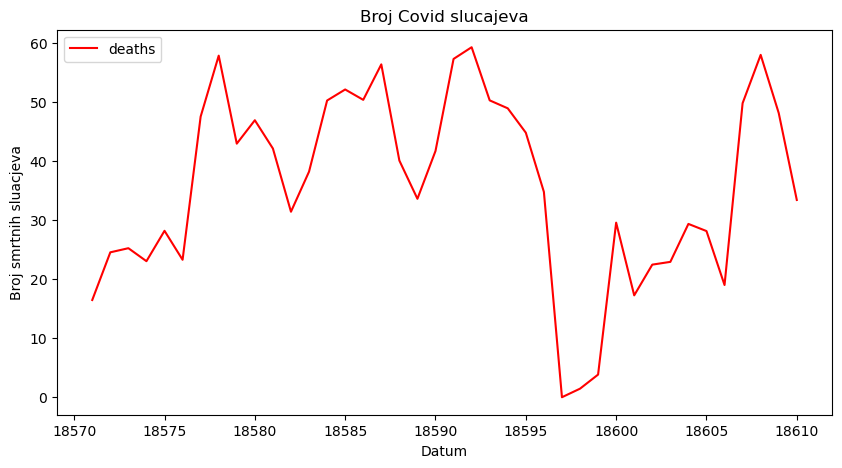

In [25]:
casedistribution_df.groupby('dateRep', as_index=False).mean().tail(40).plot(
    kind='line',
    
    x='dateRep',
    y='deaths',
    xlabel='Datum',
    ylabel='Broj smrtnih sluacjeva',
    
    figsize=(10, 5),
    
    # style='-b', uvjesto ovog načina, koristit ćemo opcije color i linestyle
    color='red',
    linestyle='solid',
    
    legend=True,
    title='Broj Covid slucajeva'
)

Graf je gotovo identičan broju slučajeva, ali obratite pažnju na Y os, sada se brojevi kreću od 0 do 60, a za broj zaraženih je bio od 0 do 3000 i više.

Ovo je odličan primjer za uključiti više grafova u jedan okvir. Srećom, Pandas nam omogućava jednostavno dodavanje više grafova unutar jednog okvira. Potrebno je samo uključiti "subplots" i definirati raspored, odnosno layout, a sve ostalo je isto kao i prije.

*INFORMACIJA*<br>
*Naravno, trebamo dodati i više kolona koje želimo uključiti, a za koje će se iscrtati dodatni grafovi.*

array([[<AxesSubplot:xlabel='dateRep'>, <AxesSubplot:xlabel='dateRep'>]],
      dtype=object)

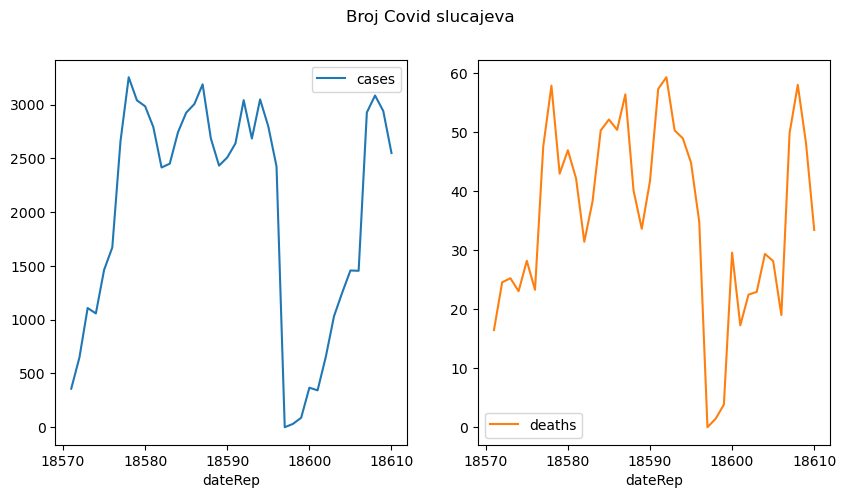

In [26]:
casedistribution_df.groupby('dateRep', as_index=False).mean().tail(40).plot(
    kind='line',
    
    x='dateRep',
    y=['cases', 'deaths'],
    # xlabel='Datum',
    # ylabel='Broj smrtnih sluacjeva',
    
    figsize=(10, 5),
    
    subplots=True,
    layout=(1, 2), # jedan red i dvije kolone, dovoljno za dva grafa.
    
    # style='-b', uvjesto ovog načina, koristit ćemo opcije color i linestyle
    # color='red',
    linestyle='solid',
    
    # legend=True,
    title='Broj Covid slucajeva'
)

**VJEŽBA**<br>
**Isključili smo argumente: *xlabel='Datum'*, *ylabel='Broj smrtnih sluacjeva'*, *color='red'* te *legend=True*. Uključite ih te provjerite što se događa s iscrtavanjem grafova.**

**ZADATAK**<br>
**Napravite iscrtavanje onolikog broja grafova koliko je potrebno za skup podataka mall_customers_df te dodajte dodatne elemente u okvir ili pojedinačne grafove.

Prethodni grafovi su dobri, ali ponekad želimo iscrtati više "zasebnih" grafova jedan pored drugog. Za to ćemo morati koristiti pomoć matplotlib biblioteke.

Prvo ćemo kreirati Pivot tabelu s jednom dodatnom metodom *rolling()* koja računa srednju vrijednost za grupe podataka definirane pomoću argumenta. Dakle, *rolling()* grupira podatke po datumu i uzima okvir od 7 dana (toliko smo definirali kroz argument) i onda za te podatke računa prosječnu vrijednost, zatim uzima sljedećih 7 dana te tako prolazi kroz cijeli skup podataka.

Sljedeći korak je kreiranje grafova pomoću *subplots()* metode iz matplotlib biblioteke. Definirali smo jedan redak i tri kolone te smo dodali da je širina okvira 15 inča, a visina 5. To smo pohranili u varijable okvir i axes kao osi.

Zatim ćemo iz Pivot tabele uzeti po jednu kolonu, za nju ćemo pokrenuti iscrtavanje grafa, ali tako da ćemo za argument ax (os) pridružiti prvi element prethodno kreirane varijable axes (liste praznih osi). To ćemo učiniti za svaki graf pojedinačno. Pri tome ćemo za svaki graf pojedinačno definirati dodatne elemente grafa.

<AxesSubplot:>

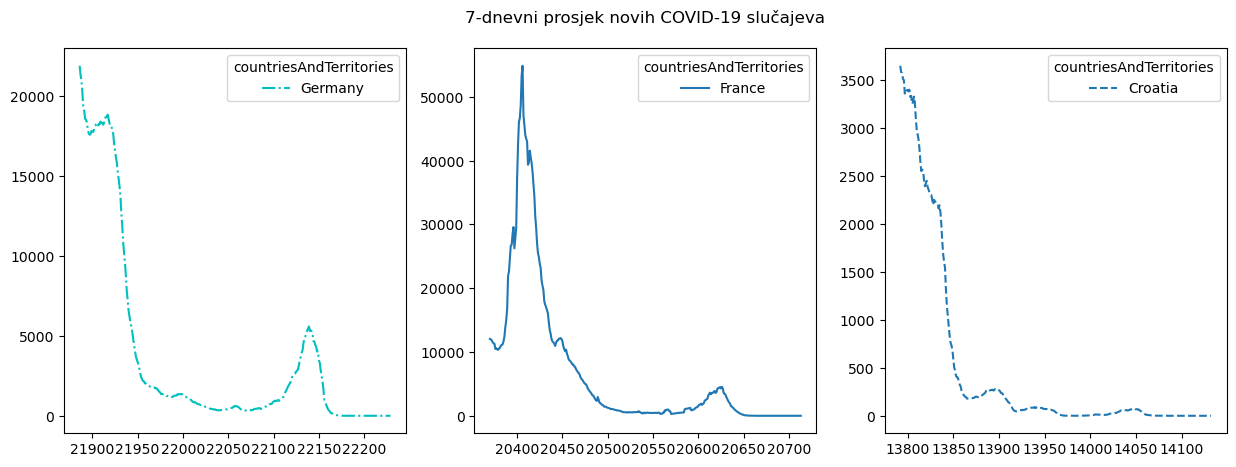

In [27]:
novi_slucajevi_prosjek = casedistribution_df.pivot_table(
    index=casedistribution_df.index, 
    columns='countriesAndTerritories', 
    values='cases').rolling(7).mean()

okvir, axes = plt.subplots(1, 3, figsize=(15, 5))

novi_slucajevi_prosjek[['Germany']].plot(
    ax=axes[0], 
    style='-.c'
)
novi_slucajevi_prosjek[['France']].plot(
    ax=axes[1], 
    style=['-', '--'],
    title='7-dnevni prosjek novih COVID-19 slučajeva\n'
)

novi_slucajevi_prosjek[['Croatia']].plot(
    ax=axes[2], 
    style=['--', ':', '-']
)

Ponekad želimo saznati odnos između varijabli. Recimo, vrijednosti nekih varijabli su grupirane oko jedne vrijednosti druge varijable i sl. Na takav način može se uočiti veza između tih varijabli. Odnos između varijabli može biti linearan ili nelinearan, a to puno lakše možemo uočiti vizualno, pomoću grafa. Tip grafa koji je idealan za ovu namjenu zovemo "scatter" ili raspršeni oblik. Najbolje je pokazati primjerom pa ćemo vidjeti kakav je to tip grafa.

Za ovaj ćemo tip grafa koristiti skup podataka o ocjenama.

In [28]:
ocjene_df = pd.read_csv('../Data/Vjezbe_Primjeri/ocjene.csv')
ocjene_df

,fname,lname,gender,age,exercise,hours,grade,address
0,Marcia,Pugh,female,17,3,10,82.4,"9253 Richardson Road, Matawan, NJ 07747"
1,Kadeem,Morrison,male,18,4,4,78.2,"33 Spring Dr., Taunton, MA 02780"
2,Nash,Powell,male,18,5,9,79.3,"41 Hill Avenue, Mentor, OH 44060"
3,Noelani,Wagner,female,14,2,7,83.2,"8839 Marshall St., Miami, FL 33125"
4,Noelani,Cherry,female,18,4,15,87.4,"8304 Charles Rd., Lewis Center, OH 43035"
...,...,...,...,...,...,...,...,...
1995,Cody,Shepherd,male,19,1,8,80.1,"982 West Street, Alexandria, VA 22304"
1996,Geraldine,Peterson,female,16,4,18,100.0,"78 Morris Street, East Northport, NY 11731"
1997,Mercedes,Leon,female,18,3,14,84.9,"30 Glenridge Rd., Bountiful, UT 84010"
1998,Lucius,Rowland,male,16,1,7,69.1,"342 West Meadowbrook Lane, Helena, MT 59601"


array([[<AxesSubplot:xlabel='hours', ylabel='grade'>,
        <AxesSubplot:xlabel='hours', ylabel='grade'>]], dtype=object)

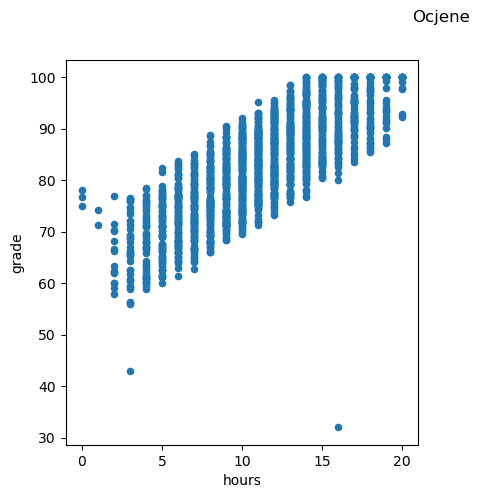

In [81]:
ocjene_df.plot(
    kind='scatter',
    
    x='hours',
    y='grade',
    # xlabel='Datum',
    # ylabel='Broj smrtnih sluacjeva',
    
    figsize=(10, 5),
    
    subplots=True,
    layout=(1, 2), # jedan red i dvije kolone, dovoljno za dva grafa.
    
    # style='-b', uvjesto ovog načina, koristit ćemo opcije color i linestyle
    # color='red',
    linestyle='solid',
    
    # legend=True,
    title='Ocjene'
)

Iz grafa možemo uočiti povezanost između ove dvije varijable te možemo zaključiti to da veći broj sati učenja, rezultira i većom ocjenom. Postoji nekoliko točaka koje odstupaju od tog pravila. Te vrijednosti su također jako korisne jer nam ukazuju na kvalitetu naših podataka. Dakle, postoje neke vrijednosti koje su izvan okvira i koje značajno odstupaju od pravila. Takve vrijednosti nazivaju se ekstremi ili *outlier*.

**VJEŽBA**<br>
**Isprobajte "scatter" tip grafa na druge kolone skupina podataka o ocjenama, ali i na skupinu podataka o broju zaraženih Covid-19 virusom.**

Započeli smo s upoznavanjem drugih tipova grafova pa nastavimo s drugim tipovima.

*INFORMACIJA: tijekom ovog seminara nećemo stići niti možemo objasniti sve tipove grafova, njihovu primjenu, konfiguraciju i slično. Jednostavno nemamo toliko vremena, ali svakako potičemo na dodatno samostalno istraživanje i učenje.*

**Histogram** je oblik grafa koji pokazuje distribuciju vrijednosti određenih varijabli, odnosno koliko često se određena vrijednost pojavljuje na skupu podataka.

<AxesSubplot:title={'center':'Broj Covid slucajeva'}, ylabel='Frequency'>

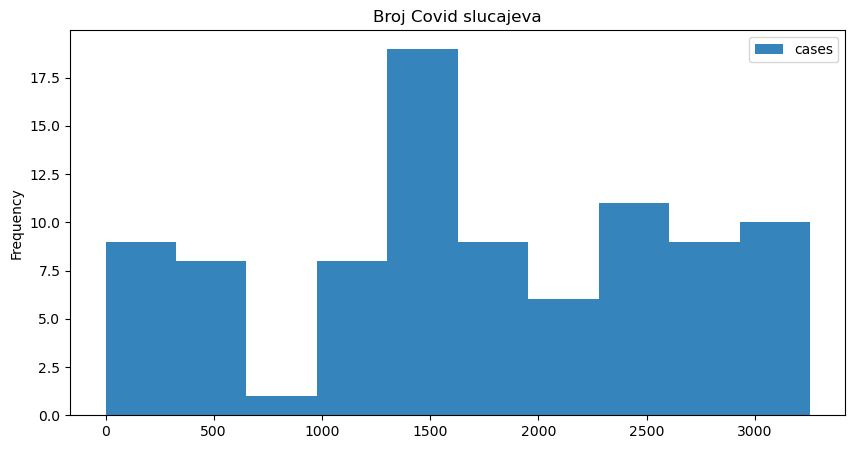

In [83]:
casedistribution_df.groupby('dateRep', as_index=False).mean().tail(90).plot(
    kind='hist',
    alpha=0.9,
    
    x='dateRep',
    y='cases',
    # xlabel='Datum',
    # ylabel='Broj smrtnih sluacjeva',
    
    figsize=(10, 5),
    
    # subplots=True,
    layout=(1, 2), # jedan red i dvije kolone, dovoljno za dva grafa.
    
    # style='-b', uvjesto ovog načina, koristit ćemo opcije color i linestyle
    # color='red',
    # linestyle='solid',
    
    legend=True,
    title='Broj Covid slucajeva'
)

Isprobajmo isti tip na podacima s ocjenama korisnika trgovačkog centra.

<AxesSubplot:title={'center':'Ocjene korisnika'}, ylabel='Frequency'>

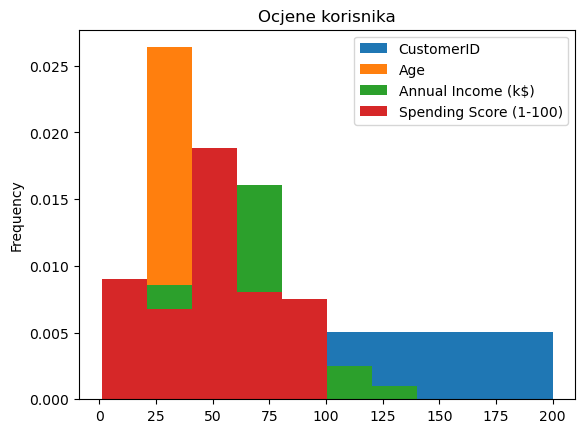

In [84]:
mall_customers_df.plot(
    kind='hist',
    density=True,
    
    title='Ocjene korisnika'
)

Zanemarimo što imamo i kolonu "CustomerID".

Za kontinuirane tipove podataka, kao što su cijene dionica ili kretanje kupovne moći korisnika i slično, za koje i dalje želimo vidjeti distribuciju podataka, koristimo poseban tip grafa naziva "KDE", što je skraćenica od "Kernel Density Estimation". Provjerimo kako KDE graf izgleda.

<AxesSubplot:title={'center':'Ocjene korisnika'}, ylabel='Density'>

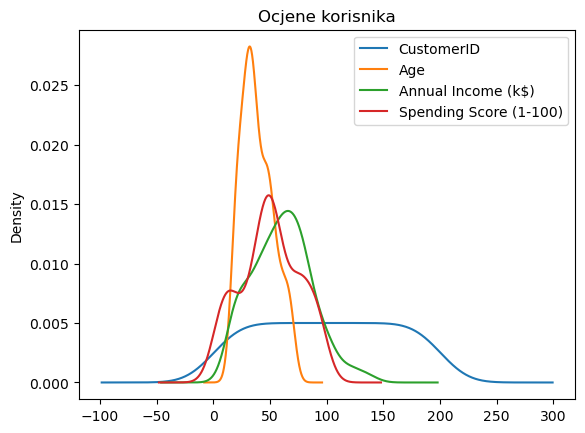

In [85]:
mall_customers_df.plot(
    kind='kde', 

    title='Ocjene korisnika'
)

Mogli bismo pojednostavljeno reći kako je oblik, odnosno silueta koju opisuju krivulje "KDE" grafa, vrh histogram grafa. Probajmo vrhove iscrtati jedan preko drugog. To ćemo napraviti tako što ćemo jedan graf pohraniti u varijablu i onda vrijednost te varijable proslijediti kao argument "ax" u drugi graf.

<AxesSubplot:title={'center':'Ocjene korisnika'}, ylabel='Density'>

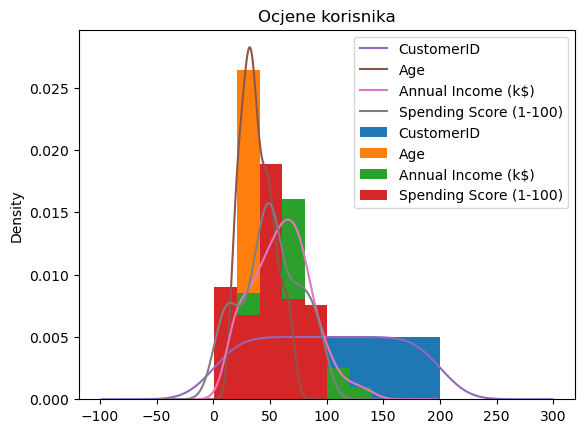

In [86]:
ax = mall_customers_df.plot(
    kind='hist',
    density=True,
    
    title='Ocjene korisnika'
)

mall_customers_df.plot(
    kind='kde', 
    
    ax=ax,
    
    title='Ocjene korisnika'
)

Već smo spomenuli *outlier* ili ekstremne vrijednosti nekih varijabli. Idealan je graf za otkrivanje takvih vrijednosti, ali i prikaz raspona unutar kojeg se nalaze vrijednosti određene varijable, "box" tip grafa.

Iscrtajmo *box* tip grafa nad skupom podataka o ocjenama.

<AxesSubplot:>

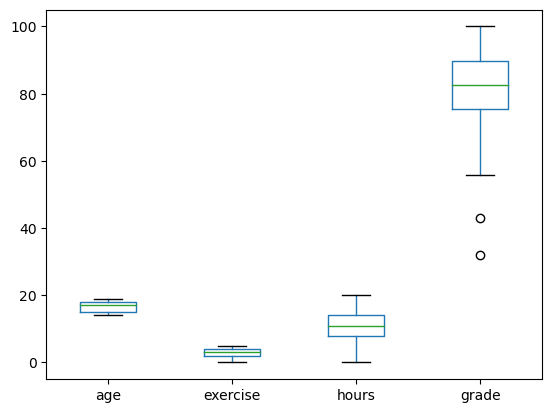

In [87]:
ocjene_df.plot(
    kind='box'
)

Prvo ćemo opisati izgled grafa. Graf se sastoji od "kutije" koja u sredini ima jednu crtu. Ovaj graf prikazuje statističke vrijednosti za svaku pojedinu varijablu (kolonu).

Točke koje stoje samostalno (kolona "grade" oko vrijednosti 40) su iznimke, ekstremi, odnosno *outlier* vrijednosti. Neke varijable ih nemaju.

Najniža crta predstavlja najmanju vrijednost (min) u skladu s time, a najviše crta prestavlja maksimalnu vrijednost (max).

Crta u sredini pravokutnika predstavlja vrijednost u sredini nakon što se podaci sortiraju (medijan).

Donja stranica pravokutnika predstavlja donji kvartil. To je 25% (jedna četvrtina) vrijednosti koje pripadaju u prvu četvrtinu. Dakle, kada skup podataka podijelimo na četiri jednaka skupa, dobijemo određene vrijednosti za granice između tih skupina. Q1 predstavlja skup svih vrijednosti koje su niže od granice između prve i druge četvrtine. Ovo je najjednostavniji opis kvartila.

Pretpostavljate da je onda gornja stranica četverokuta Q3 ili gornji kvartil, odnosno 75% vrijednosti neke varijable.

Postoji opcija "notch" za *box* tip grafa koju možemo uključiti, a koja dodaje zarez na pravokutniku na kojemu je medijan linija.

<AxesSubplot:>

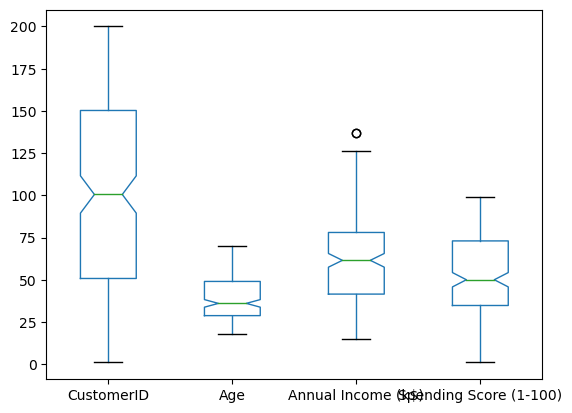

In [88]:
mall_customers_df.plot(
    kind='box',
    notch=True
)

Primjenjuje se isključivo radi bolje čitljivosti, ali ponekad to može biti i kontraproduktivno.

<AxesSubplot:>

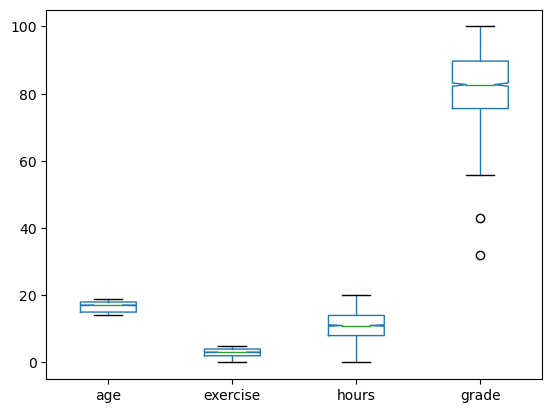

In [89]:
ocjene_df.plot(
    kind='box',
    notch=True
)

Za pravu snagu "box" grafa dodat ćemo skup podataka o zemljotresima te ćemo pomoću "box" tipa grafa prikazati distribuciju magnituda zemljotresa u odnosu na tip magnitude.

Prvo ćemo učitati skup podataka o zemljotresima.

In [90]:
earthquakes_df = pd.read_csv('../Data/Vjezbe_Primjeri/earthquakes.csv')
earthquakes_df

,alert,cdi,code,detail,dmin,felt,gap,ids,mag,magType,...,sources,status,time,title,tsunami,type,types,tz,updated,url
0,NaN,NaN,37389218,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.008693,NaN,85.0,",ci37389218,",1.35,ml,...,",ci,",automatic,1539475168010,"M 1.4 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0,1539475395144,https://earthquake.usgs.gov/earthquakes/eventp...
1,NaN,NaN,37389202,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.020030,NaN,79.0,",ci37389202,",1.29,ml,...,",ci,",automatic,1539475129610,"M 1.3 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0,1539475253925,https://earthquake.usgs.gov/earthquakes/eventp...
2,NaN,4.4,37389194,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.021370,28.0,21.0,",ci37389194,",3.42,ml,...,",ci,",automatic,1539475062610,"M 3.4 - 8km NE of Aguanga, CA",0,earthquake,",dyfi,focal-mechanism,geoserve,nearby-cities,o...",-480.0,1539536756176,https://earthquake.usgs.gov/earthquakes/eventp...
3,NaN,NaN,37389186,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.026180,NaN,39.0,",ci37389186,",0.44,ml,...,",ci,",automatic,1539474978070,"M 0.4 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0,1539475196167,https://earthquake.usgs.gov/earthquakes/eventp...
4,NaN,NaN,73096941,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.077990,NaN,192.0,",nc73096941,",2.16,md,...,",nc,",automatic,1539474716050,"M 2.2 - 10km NW of Avenal, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,scit...",-480.0,1539477547926,https://earthquake.usgs.gov/earthquakes/eventp...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9327,NaN,NaN,73086771,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.018060,NaN,185.0,",nc73086771,",0.62,md,...,",nc,",reviewed,1537230228060,"M 0.6 - 9km ENE of Mammoth Lakes, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0,1537285598315,https://earthquake.usgs.gov/earthquakes/eventp...
9328,NaN,NaN,38063967,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.030410,NaN,50.0,",ci38063967,",1.00,ml,...,",ci,",reviewed,1537230135130,"M 1.0 - 3km W of Julian, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,scit...",-480.0,1537276800970,https://earthquake.usgs.gov/earthquakes/eventp...
9329,NaN,NaN,2018261000,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.452600,NaN,276.0,",pr2018261000,",2.40,md,...,",pr,",reviewed,1537229908180,"M 2.4 - 35km NNE of Hatillo, Puerto Rico",0,earthquake,",geoserve,origin,phase-data,",-240.0,1537243777410,https://earthquake.usgs.gov/earthquakes/eventp...
9330,NaN,NaN,38063959,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.018650,NaN,61.0,",ci38063959,",1.10,ml,...,",ci,",reviewed,1537229545350,"M 1.1 - 9km NE of Aguanga, CA",0,earthquake,",focal-mechanism,geoserve,nearby-cities,origin...",-480.0,1537230211640,https://earthquake.usgs.gov/earthquakes/eventp...


Zatim ćemo grupirati podatke za varijable (kolone) o magnitudama i tipovima magnitude te iscrtati graf.

*INFORMACIJA*<br>
*Obratite pažnju na to da koristimo metodu ".boxplot()". Za neke grafove, Pandas nam omogućava korištenje metode za iscrtavanje grafova. Isto smo tako, za iscrtavanje naslova grafa te naziva Y osi, koristili matplotlib biblioteku i svojstva plt.title() te plt.ylabel().*

Text(0, 0.5, 'Magnituda')

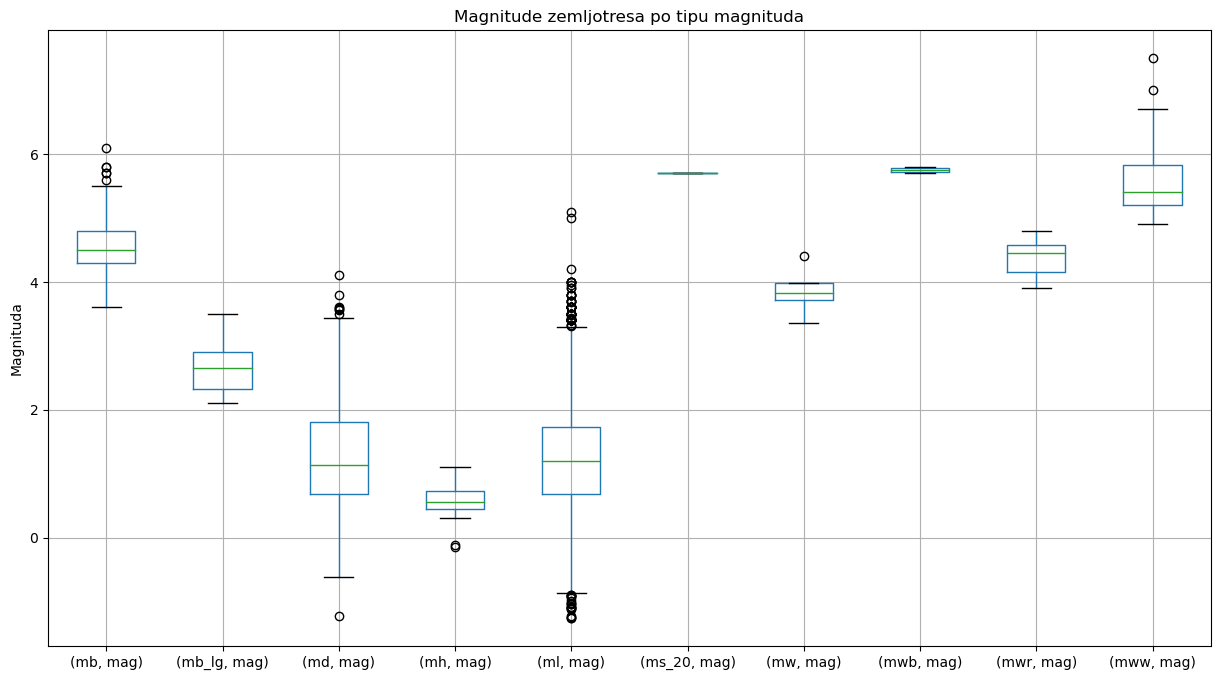

In [91]:
earthquakes_df[['mag', 'magType']].groupby('magType').boxplot(figsize=(15, 8), subplots=False)

plt.title('Magnitude zemljotresa po tipu magnituda')
plt.ylabel('Magnituda')

X os prikazuje tipove magnituda. Opis što znači "mb", "ml" ... imate na poveznici: https://earthquake.usgs.gov/learn/glossary/?term=magnitude.

Iskoristimo skup podataka o zemljotresima kako bismo se upoznali s još jednim često korištenim tipom prikaza podataka naziva "bar". Tip ćemo zvati tako jer prijevod "šipka" nije uobičajen. 

Ovaj tip ne treba miješati s histogramom zato jer "bar" tip grafa koristimo za prikaz broja ponavljanja vrijednosti u nekoj varijabli (*count*).

Prikažimo "bar" grafom koliko se puta dogodio zemljotres napojedinim lokacijama.

Text(0.5, 0, 'Zemljotresi')

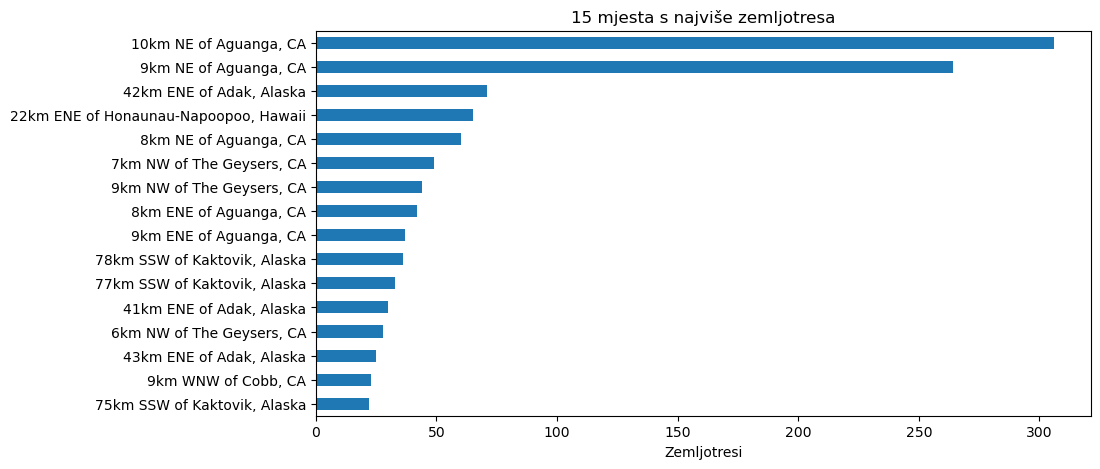

In [93]:
earthquakes_df.place.value_counts().iloc[15::-1,].plot(
    kind='barh',
    figsize=(10, 5),
    title='15 mjesta s najviše zemljotresa'
)

plt.xlabel('Zemljotresi')

Prvo ćemo pojasniti sintaksu. Umjesto *earthquakes_df\['place'\]* mi smo koristili *earthquakes_df.place*. Dakle, Pandas nam omogućava da pojedinim varijablama, odnosno kolonama pristupamo kao svojstvima nekog objekta.

Sljedeći korak je korištenje metode *value_counts()* kako bismo prebrojali vrijednosti za tu varijablu.

Indeks reda ili *iloc\[15::-1,\]* - *iloc* predstavlja "*index location*". Mi smo, zahvaljajući Python sintaksi, sa "*slice*" liste uzeli zadnjih 15 vrijednosti (obratite pažnju da je korak -1)  i onda smo pozvali metodu plot za iscrtavanje grafa tipa *'barh'* (dodatak slova h označava iscrtavanje grafa s HORIZONTALNIM "šipkama"), a 'bar' iscrtava vertikalne.

Ovaj skup podataka ima i podatke o cunamijima.

Za cunami ćemo podatke morati malo drugačije izdvojiti. Prvo ćemo grupirati sve podatke po varijabli mjesta, zatim ćemo iz te skupine podataka nad kolonom "tsunami", pokrenuti metodu "*sum()*" kako bismo zbrojili sve cunamije na toj lokaciji i na kraju sortirali vrijednosti te izabrali samo zadnjih 15. Naravno, na kraju smo pomoću *.plot()* metode iscrtali te podatke.

Text(0.5, 0, 'Cunami')

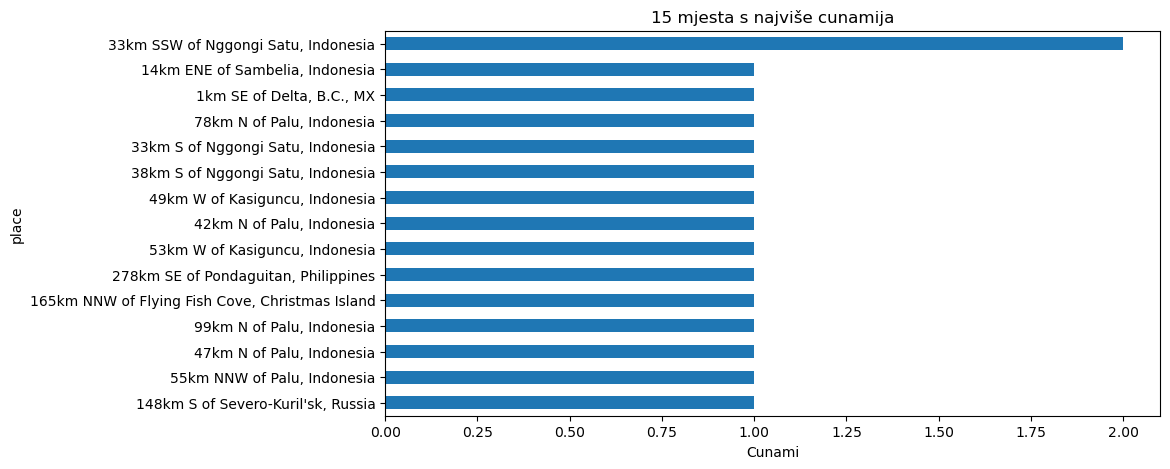

In [94]:
earthquakes_df.groupby('place').tsunami.sum().sort_values().iloc[-15:,].plot(
    kind='barh',
    figsize=(10, 5),
    title='15 mjesta s najviše cunamija'
)

plt.xlabel('Cunami')

Ovo je odličan primjer zbog čega podatke trebamo prilagoditi prije vizualizacije. Isto tako, služi kao dokaz tomu kako ćemo obradu podataka raditi paralelno s vizualizacijom jer ponekad otkrijemo da ne možemo koristiti podatke pa ih onda još jednom "presložimo" kako bi nam bili korisniji.

Problem u gornjem grafu je taj što imamo jako puno PONAVLJANJA, koja se za Indoneziju drugačije tretiraju. Odnosno cunamiji bi u Indoneziji, u našem slučaju, trebali biti objedinjeni pod jednom vrijednosti. Ponekad će biti korisno znati distribuciju po regijama unutar neke zemlje, recimo Indonezije.

Vratimo se na naš primjer. Pokušajmo pomoću Pythona preimenovati vrijednosti za mjesta tako da ih učinimo nama korisnijima. Koristit ćemo metodu *.replace()* unutar "*str*" objekta tako što ćemo proći kroz sve vrijednosti u koloni "place", počistiti "višak" informacija i sve pohraniti u novu kolonu.

**NAPOMENA:  ako trebate mijenjati podatke unutar skupa podatka, najbolje je kreirati novu kolonu u koju ćete pohraniti nove vrijednosti.**

Koristiti ćemo i "REGEX - Regular expressions" argument koji nam omogućava provjeru znakova unutar nekog teksta na osnovi predefiniranog predloška. Regex se jako često koristi u programiranju za kontrolu unosa podataka. Kada u neku formu unosite podatke o broju telefona ili email adresi, regex definira kako će izgledati oblik broja telefona pa nećete moći unijeti broj u obliku 00385011234567 nego kao +385 (0)1 1234 567. Više detalja na poveznici: https://docs.python.org/3/howto/regex.html.

Osim *regex=True* koristimo i oznaku *r* ispred početka string varijable. Ovo malo slovo *r* označava "*row string*". Više detalja u Python dokumentaciji: https://docs.python.org/3/reference/lexical_analysis.html#string-and-bytes-literals.

Prvo ćemo zamijeniti praznim stringom sve:
- *r'.* *of ', ''* - iza točke što ima "*of*"
- *'the ', ''* - što počinje s *the*. 

Zatim ćemo promijeniti skraćenice u pune nazive za:
- California
- Nevada
- Mexico. 

Preimenovati neke lokacije:
- Fiji Islands u Fiji.

Na kraju, pomoću *.strip()* metode, maknite preostale prazne znakove (primjer: razmaci koji su ostali uz riječi).

Dodatno ćemo ispisati mjesta koja smo dobili kao provjeru.

In [96]:
earthquakes_df['mjesta'] = earthquakes_df.place.str.replace(
    r'.* of ', '', regex=True
).str.replace(
    'the ', ''
).str.replace(
    r'CA$', 'California', regex=True
).str.replace(
    r'NV$', 'Nevada', regex=True
).str.replace(
    r'MX$', 'Mexico', regex=True
).str.replace(
    r' region$', '', regex=True
).str.replace(
    'northern ', ''
).str.replace(
    'Fiji Islands', 'Fiji'
).str.replace(
    r'^.*, ', '', regex=True
).str.strip()

earthquakes_df.mjesta.sort_values().unique()

array(['Afghanistan', 'Alaska', 'Argentina', 'Arizona', 'Arkansas',
       'Ascension Island', 'Australia', 'Azerbaijan', 'Balleny Islands',
       'Barbuda', 'Bolivia', 'British Virgin Islands', 'Burma',
       'California', 'Canada', 'Carlsberg Ridge',
       'Central East Pacific Rise', 'Central Mid-Atlantic Ridge', 'Chile',
       'China', 'Christmas Island', 'Colombia', 'Colorado', 'Costa Rica',
       'Dominican Republic', 'East Timor', 'Ecuador', 'El Salvador',
       'Fiji', 'Greece', 'Greenland', 'Guam', 'Guatemala', 'Haiti',
       'Hawaii', 'Honduras', 'Idaho', 'Illinois', 'India',
       'Indian Ocean Triple Junction', 'Indonesia', 'Iran', 'Iraq',
       'Italy', 'Jamaica', 'Japan', 'Kansas', 'Kentucky',
       'Kermadec Islands', 'Kuril Islands', 'Kyrgyzstan', 'Martinique',
       'Mauritius', 'Mayotte', 'Mexico', 'Mid-Indian Ridge', 'Missouri',
       'Montana', 'Nevada', 'New Caledonia', 'New Hampshire',
       'New Mexico', 'New Zealand', 'Nicaragua', 'North Carolina',


Probajmo sada iscrtati isti graf, ali nad novom kolonom u kojoj smo preuredili nazive mjesta.

Text(0.5, 0, 'Cunami')

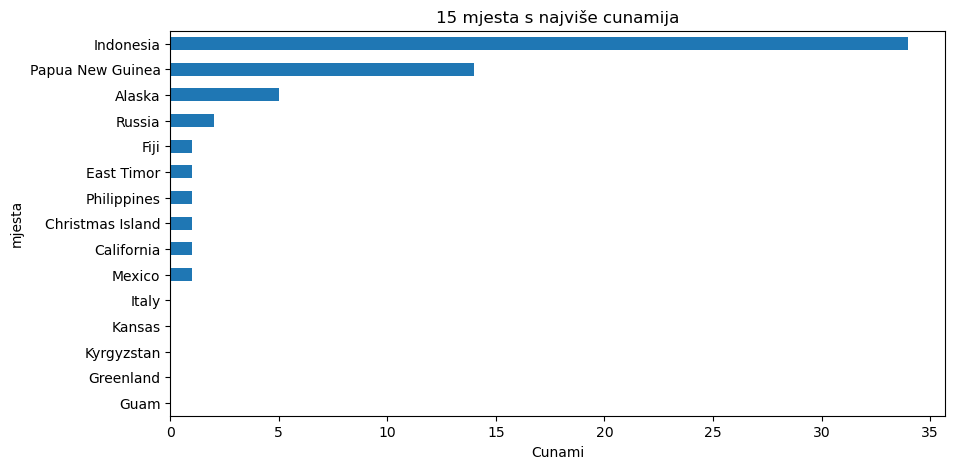

In [98]:
earthquakes_df.groupby('mjesta').tsunami.sum().sort_values().iloc[-15:,].plot(
    kind='barh',
    figsize=(10, 5),
    title='15 mjesta s najviše cunamija'
)

plt.xlabel('Cunami')

Dobivamo graf koji je puno korisniji.

Vidimo da Indonezija prednjači u cunamijima. Iscrtajmo graf koji će nam pokazati vrijednosti za broj zemljotresa i cunamija u Indoneziji po danu.

Opet ćemo morati malo preurediti podatke.

Text(0, 0.5, 'Broj')

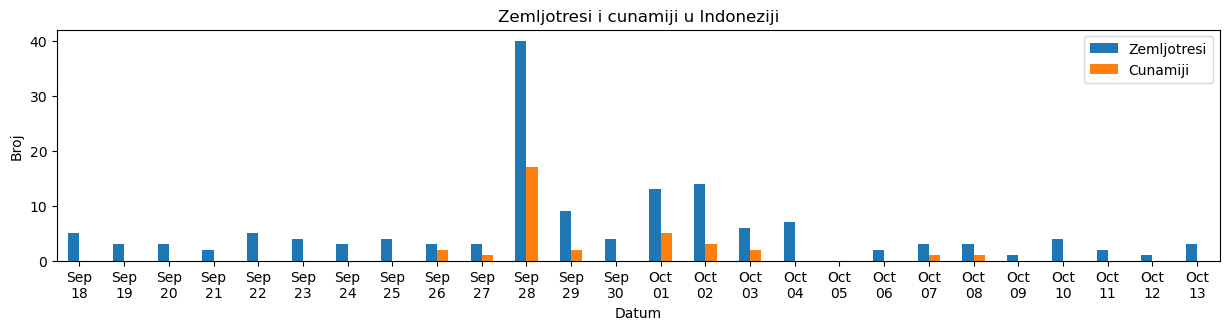

In [108]:
indonesia_zemljotresi = earthquakes_df.query(
    'mjesta == "Indonesia"' # Filtriraj mjesta s vrijednosti Indonesia
).assign( # Iz filtriranih podataka kreiraj novi objekt koji će imati izmijenjene podatke tako što
    time=lambda x: pd.to_datetime(x.time, unit='ms'), # će svaki datum unutar time kolone
                                                      # pretvoriti u Pandas vrijeme
    earthquake=1
).set_index('time').resample('1D').sum() # podesi indeks tako da je to kolona "time" 
                                         #te ga resample = kreiraj skupine po danu i na kraju sumiraj

indonesia_zemljotresi.index = indonesia_zemljotresi.index.strftime('%b\n%d') # Formatiraj prikaz vremena

indonesia_zemljotresi.plot(
    kind='bar', 
    rot=0,
    
    y=['earthquake', 'tsunami'], 
    
    figsize=(15, 3), 
    label=['Zemljotresi', 'Cunamiji'],
    
    title='Zemljotresi i cunamiji u Indoneziji'
)

plt.xlabel('Datum')
plt.ylabel('Broj')

Dana 28.9.  dogodio se veliki broj zemljotresa koji su izazvali veliki broj cunamija. Moguće je da se radi o jednom velikom i puno manjih.

Možemo vidjeti i koliko se često poslije zemljotresa pojavi cunami na pojedinoj lokaciji. To ćemo napraviti pomoću *groupby()* i *unstack()* metoda.

Text(0, 0.5, 'Mjesto')

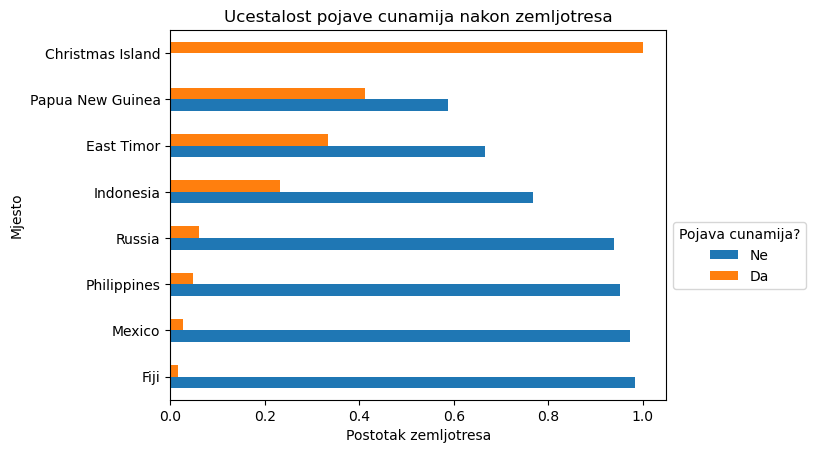

In [109]:
earthquakes_df.groupby(['mjesta', 'tsunami']).mag.count().unstack().apply(
    lambda x: x / x.sum(), axis=1
).rename(
    columns={0: 'Ne', 1: 'Da'}
).sort_values(
    'Da', ascending=False
)[7::-1].plot.barh(
    title='Ucestalost pojave cunamija nakon zemljotresa'
)

plt.legend(title='Pojava cunamija?', bbox_to_anchor=(1.0, 0.5)) # Pozicioniranje legende grafa
plt.xlabel('Postotak zemljotresa')
plt.ylabel('Mjesto')

Iscrtajmo jedan 'bar' graf s vertikalnim linijama. Prikažimo broj zemljotresa za svaki tip magnitude.

Text(0, 0.5, 'Zemljotresi')

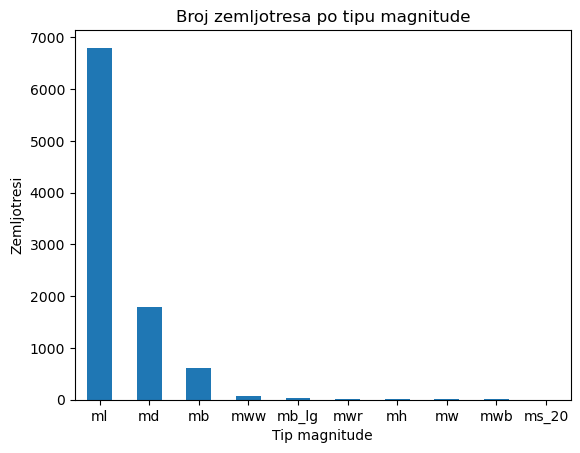

In [110]:
earthquakes_df.magType.value_counts().plot(
    kind='bar',
    rot=0,
    title='Broj zemljotresa po tipu magnitude'
)

plt.xlabel('Tip magnitude')
plt.ylabel('Zemljotresi')

Vidimo da je najviše zemljotresa magnitude 'ml'. Dodajmo i podatak o vrijednosti jačine zemljotresa u graf. Za ovo ćemo morati koristiti Pivot tabelu i NumPy biblioteku jer Python metodu *math.floor()* možemo koristiti samo za pojedinačne podatke, a mi imamo seriju podataka.

Text(0.5, 0, 'Jačina zemljotresa')

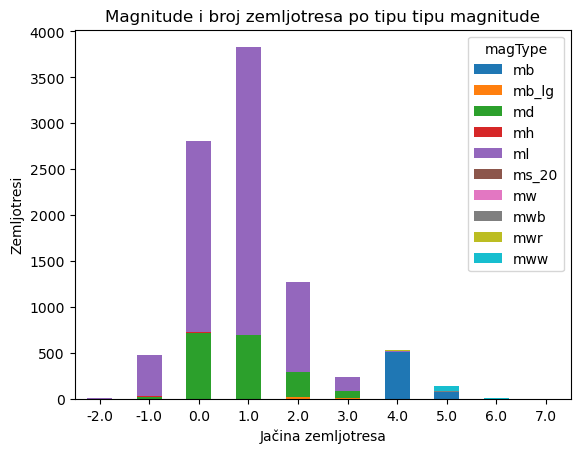

In [116]:
import numpy as np # Uključi NumPy biblioteku

pivot_table = earthquakes_df.assign(
    mag_bin=lambda x: np.floor(x.mag) # Zaokruži vrijednosti na prvi manji cijeli broj 5.7 u 5
).pivot_table(
    index='mag_bin',
    columns='magType',
    values='mag',
    aggfunc='count'
)

pivot_table.plot.bar(
    stacked=True,
    rot=0,
    title='Magnitude i broj zemljotresa po tipu tipu magnitude'
)

plt.ylabel('Zemljotresi')
plt.xlabel('Jačina zemljotresa')

Vidimo da najviše ima zemljotresa jačine 1, magnitude "ml".

**ZADATAK**<br>
**Probajte gore pokazane primjere koristiti za iscrtavanje bar grafova na skupinama podataka s ocjenama studenata te ocjenama trgovačkog lanca.

Na kraju ovog poglavlja, upoznajmo se s jednim modulom za vizualizaciju podataka iz Pandas biblioteke. To je modul *plotting()*.

Upoznat ćemo se s jednom metodom iz tog modula koja prikazuje korelaciju, odnos između varijabli unutar skupine podataka. To je metoda "autocorrelation_plot".

Idemo vidjeti kako se koristi i što nam pokazuje.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

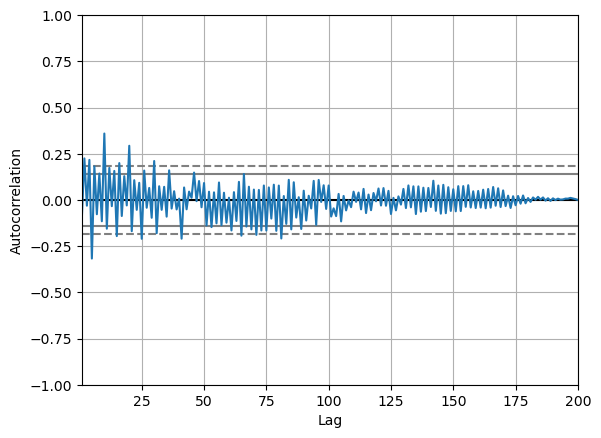

In [121]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(mall_customers_df['Age'])

Graf nam prikazuje postoji li za ovu varijablu neka druga s kojom je varijabla u nekom odnosu. Što je vrijednosti bliža 1, to je korelacija veća, a što je bliža 0, to je korelacija manja.

Probajmo s varijablom 'Spending Score (1-100)'.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

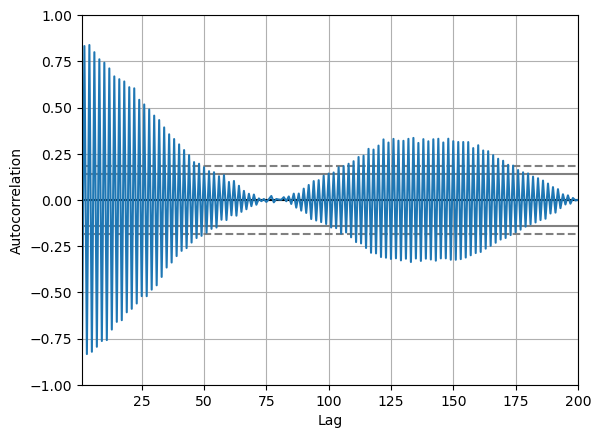

In [122]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(mall_customers_df['Spending Score (1-100)'])

Očigledno postoji neko podudaranje. Sjećate li se metode *corr()* iz Pandas biblioteke? Pogledajmo što nam ta metoda pokazuje.

In [125]:
mall_customers_df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


Varijable 'Annual Income (k$)' i 'Spending Score (1-100)' imaju najveće vrijednosti. Prikažimo graf za sve varijable.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

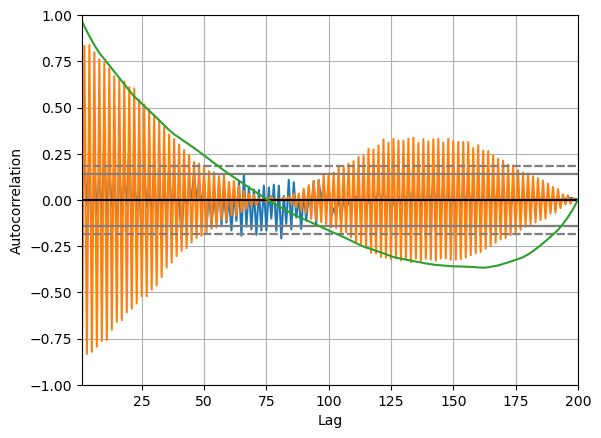

In [127]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(mall_customers_df['Age'])
autocorrelation_plot(mall_customers_df['Spending Score (1-100)'])
autocorrelation_plot(mall_customers_df['Annual Income (k$)'])

Vidimo da su zadnje dvije varijable u određenom odnosu. Time se može pretpostaviti da će ovisno o visini plaća, "score" potrošnje biti veći.

**ZADATAK**<br>
**Na stranici https://www.gapminder.org/data/ preuzmite po jednu csv datoteku (po izboru) iz:**
- **Economy**
- **Communication**
- **Education**

**Preuzete podatke iz skupina podataka obradite pomoću Pandas biblioteke tako da ih prilagodite za vizualizaciju i daljnju obradu. Prilikom obrade podataka, osim tabličnog prikaza, koristite i grafove kako biste uočili neke anomalije u podacima.**

**Nakon što ste obradili podatke, koristeći sve grafove koje smo do sada naučili (ako mislite da je važno za bolju vizualizaciju podatka, dodajte i drugi tip grafa, koji nismo ovdje obradili), prikažite grafički obrađene podatke.**